In [1]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB

In [2]:
def read_file(filename):
    df = pd.read_csv(filename)
    print(df.shape)
    df['label'] = df['label'].apply(lambda x: x.strip().lower())
    return df

In [4]:
FILE_HO_TRAIN = 'training.csv'
FILE_HO_TEST = 'testingv2.csv'

df_ho_train = read_file(FILE_HO_TRAIN)
df_ho_test = read_file(FILE_HO_TEST)

(5400, 8)
(310, 8)


In [5]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
df_ho_train['Target'] = target_encoder.fit_transform(df_ho_train['label'])
df_ho_test['Target'] = target_encoder.transform(df_ho_test['label'])

x_ho_train = df_ho_train.drop(['label', 'Target'], axis=1)
y_ho_train = df_ho_train['Target']

x_ho_test = df_ho_test.drop(['label', 'Target'], axis=1)
y_ho_test = df_ho_test['Target']

In [8]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_ho_train, y_ho_train)
modelnb.score(x_ho_test,y_ho_test)

0.5451612903225806

In [9]:
from sklearn.metrics import accuracy_score, f1_score

predicted= modelnb.predict(x_ho_test)

accuracy_ho = accuracy_score(predicted, y_ho_test) * 100
print('Akurasi pada Algoritma RandomForest menggunakan split dengan persentase 90:10 = %s' % accuracy_ho)

Akurasi pada Algoritma RandomForest menggunakan split dengan persentase 90:10 = 54.516129032258064


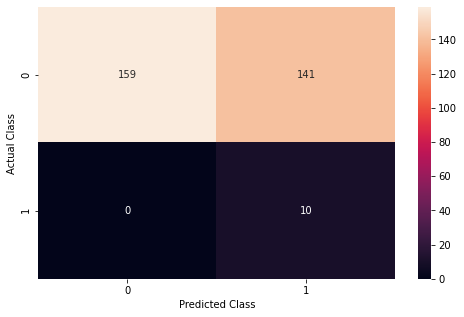

In [10]:
# Create Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_matrix(y_ho_test, predicted) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_ho_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [11]:
# Performance Matrix Report - Precision Recall f1score

from sklearn.metrics import classification_report
print (classification_report(y_ho_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       300
           1       0.07      1.00      0.12        10

    accuracy                           0.55       310
   macro avg       0.53      0.77      0.41       310
weighted avg       0.97      0.55      0.67       310

